In [86]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [87]:
df = pd.read_excel("default of credit card clients.xlsx", index_col=False)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [88]:
df.drop("ID", axis=1 ,inplace=True)
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [90]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [91]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Yes = 1, No = 0

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

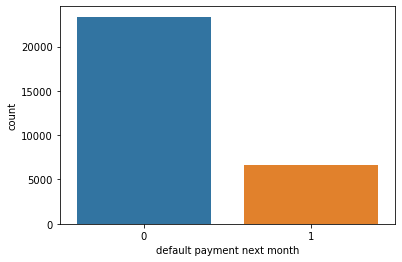

In [92]:
sns.countplot(x='default payment next month', data=df)

histogram plot for default payment

In [93]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

1 = male
2 = female

<AxesSubplot:xlabel='SEX', ylabel='count'>

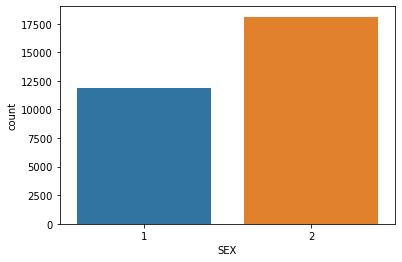

In [94]:
sns.countplot(x='SEX', data=df)

In [95]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1 = graduate school; 2 = university; 3 = high school; 4 = others

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

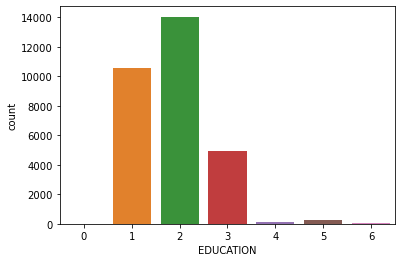

In [96]:
sns.countplot(x='EDUCATION', data=df)

In [97]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

1 = married; 2 = single; 3 = others

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

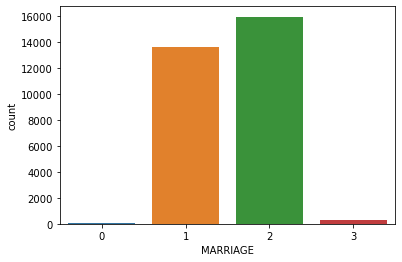

In [98]:
sns.countplot(x='MARRIAGE', data=df)

In [99]:
X = df.drop("default payment next month", axis=1)

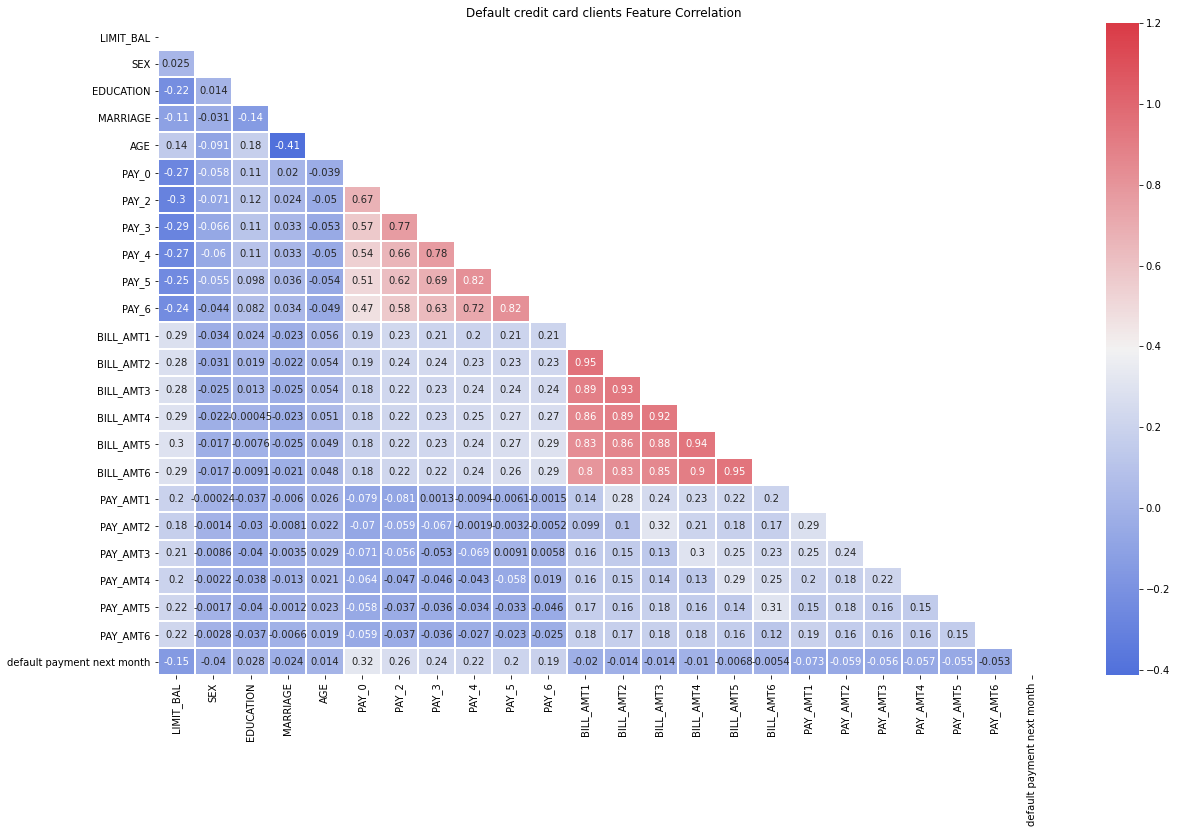

In [100]:
corrMatt = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Default credit card clients Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

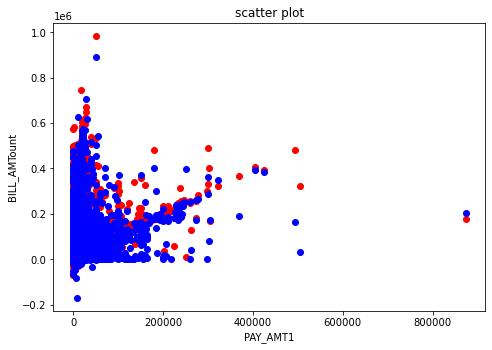

In [101]:
colors = np.random.rand(2)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['PAY_AMT1'], df['BILL_AMT2'], color='r')
ax.scatter(df['PAY_AMT1'], df['BILL_AMT4'], color='b')
ax.set_xlabel('PAY_AMT1')
ax.set_ylabel('BILL_AMTount')
ax.set_title('scatter plot')
plt.show()

In [102]:
X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['default payment next month'] = le.fit_transform(df['default payment next month'])
df.head()
# assign numerical label to y
y = df['default payment next month']

In [ ]:
from sklearn.model_selection import train_test_split

Xs = df
# y = y.head(7500)
# Xs = Xs[:7500]

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
random_state=1, stratify=y)

In [122]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10).fit(Xs_train, y_train)
y_pred = dt.predict(Xs_test)

In [125]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6513,  496],
       [1214,  777]], dtype=int64)

In [126]:
metrics.accuracy_score(y_test, y_pred)

0.81

<AxesSubplot:>

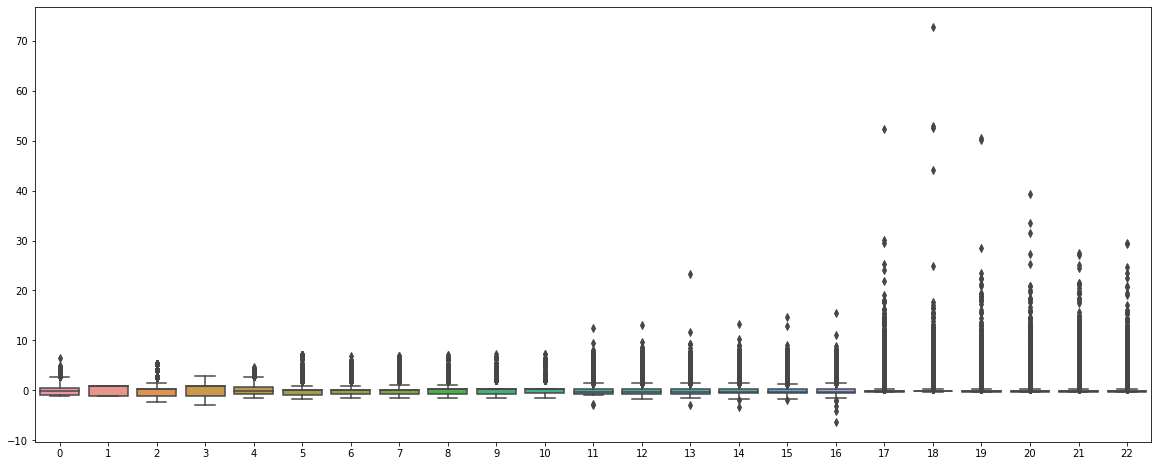

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['default payment next month'] = le.fit_transform(df['default payment next month'])
df.head()
# assign numerical label to y
y = df['default payment next month']

In [105]:
from sklearn.model_selection import train_test_split

# y = y.head(7500)
# Xs = Xs[:7500]

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
random_state=1, stratify=y)

In [106]:
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(Xs_train, y_train)

SVC(gamma='auto', probability=True)

In [107]:
classifier_score = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.82


In [ ]:
from sklearn.model_selection import KFold
import time
import os

kf = KFold(n_splits=5)
k=1

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() 

for train_index, test_index in kf.split(Xs):
    print("fold",k)
 
    X_train, X_test = Xs[train_index], Xs[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # training and validation
    clf.fit(np.array(X_train), np.array(y_train))

    # evaluate the accuracy of each fold
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("%s: %.2f%%" % ("Classification accuracy", score*100))
    k=k+1

In [108]:
def setDifference(F: list, X:list):
    
    for x in X:

        for f in F:
            if x == f:
                F.remove(f)
                break

    return F

In [109]:
def scoreFeatures(toDrop:list):

    X = df.drop("default payment next month", axis=1)

    for d in toDrop:
        X.drop(d, axis=1)

    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    y = None


    le = LabelEncoder()
    df['default payment next month'] = le.fit_transform(df['default payment next month'])
    df.head()
    # assign numerical label to y
    y = df['default payment next month']

    # y = y.head(7500)
    # Xs = Xs[:7500]

    Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
    random_state=1, stratify=y)

    clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
    clf.fit(Xs_train, y_train)

    classifier_score = clf.score(Xs_test, y_test)
    print("Excluded: ",toDrop,' The classifier accuracy score is {:03.2f}'.format(classifier_score))

    return classifier_score 

In [110]:
scoreFeatures(['MARRIAGE'])

Excluded:  ['MARRIAGE']  The classifier accuracy score is 0.82


0.8181111111111111

In [111]:
# features = list(df.columns)
# features.remove('default payment next month')

# selectedFeatures = []

# while len(selectedFeatures) != len(features):
    
#     b = 0
#     y = []
#     tmpF = setDifference(features, selectedFeatures)

#     for f in tmpF:
#         tmpX = selectedFeatures
#         tmpX.append(f)
#         toExclude = setDifference(features, tmpX)
#         m = scoreFeatures(toExclude)

#         if m > b:
#             b = m
#             y_score = tmpX

#     toExclude = setDifference(features, selectedFeatures)
#     m = scoreFeatures(toExclude)

#     if m > b:
#         break
#     else:
#         selectedFeatures = y_score

# print("selectedFeatures: ",selectedFeatures)


In [112]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [113]:
from sklearn.feature_selection import RFE
rfe = RFE(clf)
fit = rfe.fit(Xs, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 11
Selected Features: [ True False  True  True False  True  True  True False False False  True
  True  True False False False  True  True False False False False]
Feature Ranking: [ 1  7  1  1  2  1  1  1 10  3 13  1  1  1 12  5 11  1  1  6  4  8  9]


In [116]:
clf = LogisticRegression()
clf.fit(Xs_train, y_train)
y_pred = clf.predict(Xs_test)

In [119]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6810,  199],
       [1502,  489]], dtype=int64)

81.1% classifacation accuracy

In [121]:
metrics.accuracy_score(y_test, y_pred)

0.811

In [80]:
from sklearn.model_selection import KFold
import time
import os

In [81]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() 

In [140]:
kf = KFold(n_splits=5)
k=1

In [141]:
for train_index, test_index in kf.split(Xs):
    print("fold",k)
 
    X_train, X_test = Xs[train_index], Xs[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # training and validation
    clf.fit(np.array(X_train), np.array(y_train))

    # evaluate the accuracy of each fold
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("%s: %.2f%%" % ("Classification accuracy", score*100))
    k=k+1

fold 1
Classification accuracy: 80.47%
fold 2
Classification accuracy: 79.83%
fold 3
Classification accuracy: 79.87%
fold 4
Classification accuracy: 82.77%
fold 5
Classification accuracy: 81.92%


In [129]:
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim=23,activation="relu"))
model.add(keras.layers.Dense(1,activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                240       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
metrics=["accuracy"])
# save the initial weight for initilise new models in cross validation
model.save_weights('model.h5')


In [132]:

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2,
random_state=1, stratify=y)

In [133]:
# Now we can start the training
# Tensorflow/Keras uses np array, so need to convert the data format
#make sure the weights are initialised
model.load_weights('model.h5')
history= model.fit(np.array(Xs_train), np.array(y_train), epochs=50,
validation_data=(np.array(Xs_test), np.array(y_test)))


Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 3.2523 - accuracy: 0.7745 - val_loss: 3.4880 - val_accuracy: 0.7442
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 3.3930 - accuracy: 0.7668 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 

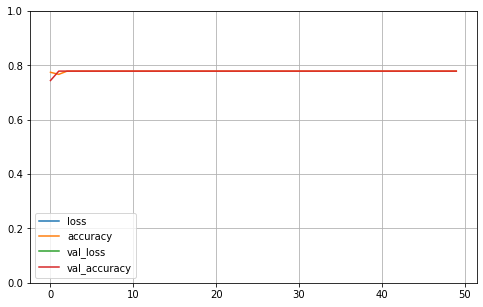

In [134]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [135]:
from sklearn.model_selection import KFold
import os
import time

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
 
run_logdir = get_run_logdir() 

In [136]:
kf = KFold(n_splits=5)
k=1


In [137]:
for train_index, test_index in kf.split(Xs):
    print("fold",k)
 # initialise the weight for each fold
    model.load_weights('model.h5')
# Split the data
    X_train, X_test = Xs[train_index], Xs[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # tensorboard for visualising the training process later
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    # training and validation
    model.fit(np.array(X_train), np.array(y_train), epochs=10,
    validation_data=(np.array(X_test),
    np.array(y_test)),callbacks=[tensorboard_cb])

    #save the model of each fold
    model.save(os.path.join('fold_{}_model.hdf5'.format(k)))

    # evaluate the accuracy of each fold
    scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    k=k+1


fold 1
Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 2.9782 - accuracy: 0.7712 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812